<a href="https://colab.research.google.com/github/thangchu77/Deep-Learning-project/blob/main/Convolution_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem set 1: Dataset has 10 points created from the function $\textbf{y = x^2}$ + noise. Using sklearn.fit with function 9th degree. Provide another 100 points and use again the function 9th degree

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import operator

In [ ]:
#Create data
np.random.seed(0)
noise = 1e-6
X = np.random.normal(0,1,10).reshape(-1,1)
y = np.square(X) + noise

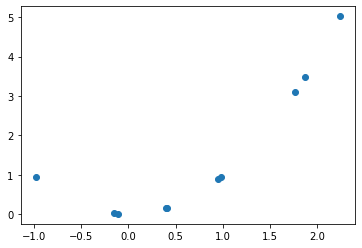

In [ ]:
#Plot data
plt.scatter(X, y)
plt.show()

In [ ]:
#Create a transformed model
model = PolynomialFeatures(degree=9)
X_transform = model.fit_transform(X)
linear = LinearRegression()
linear.fit(X_transform, y)
y_pred = linear.predict(X_transform)

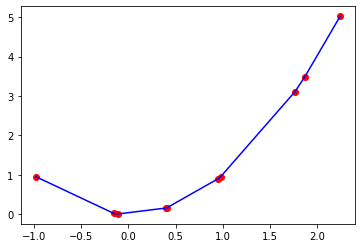

In [ ]:
#Plot on the graph
plt.scatter(X, y, c='r')

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_pred), key=sort_axis)
x_sort, y_sort = zip(*sorted_zip)

plt.plot(x_sort, y_sort, c='b')
plt.show()

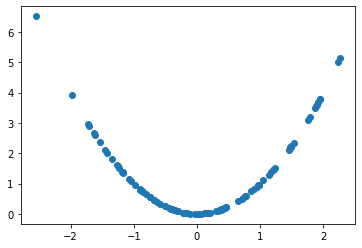

In [ ]:
#Add more data into the dataset
Xnew = np.random.normal(0,1,100).reshape(-1,1)
Xnew = np.append(X, Xnew).reshape(-1,1)
Ynew = np.square(Xnew) + noise
plt.scatter(Xnew, Ynew)

In [ ]:
#Fit and predict based on the new data
Xnew_transform = model.fit_transform(Xnew)
linear.fit(Xnew_transform, Ynew)
ynew_pred = linear.predict(Xnew_transform)

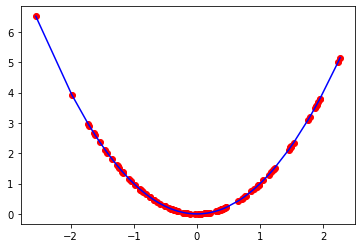

In [ ]:
#Plot on the graph based on new data
plt.scatter(Xnew, Ynew, c='r')

sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(Xnew,ynew_pred), key=sort_axis)
xnew_sort, ynew_sort = zip(*sorted_zip)

plt.plot(xnew_sort, ynew_sort, c='b')
plt.show()

# Problem set 2: Implement convolution function with input X, W, stride, padding, output Y. Implement Sobel function

In [ ]:
def convolution(X, W, stride, padding):
  #Create an array for output Y
  dimension = (X.shape[0] - W.shape[0] + 2 * padding)/stride + 1
  Y = np.zeros((int(dimension), int(dimension)))
  print(Y)
  
  #Create padding if it is True
  print(X)
  if padding == 1:
    X = np.pad(X, 1, mode='constant')
  print(X)

  #Calculate for each entry of the new Y
  print(W)
  for i in range(Y.shape[0]):
    for j in range(Y.shape[0]):
      start_row = i*stride
      end_row = i*stride+W.shape[0]
      start_column = j*stride
      end_column = j*stride+W.shape[0]
      Y[i,j] = np.sum(np.multiply(X[start_row: end_row, start_column: end_column], W))

  return Y

In [ ]:
#Create 2D X and 1 layer W to do the convolution operation 
X = np.arange(25).reshape(5,5)
np.random.shuffle(X)
W = np.arange(9).reshape(3,3)
np.random.shuffle(W)

Y = convolution(X, W, 1, 1)
print(Y)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[10 11 12 13 14]
 [15 16 17 18 19]
 [ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [20 21 22 23 24]]
[[ 0  0  0  0  0  0  0]
 [ 0 10 11 12 13 14  0]
 [ 0 15 16 17 18 19  0]
 [ 0  5  6  7  8  9  0]
 [ 0  0  1  2  3  4  0]
 [ 0 20 21 22 23 24  0]
 [ 0  0  0  0  0  0  0]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[328. 472. 505. 538. 336.]
 [255. 357. 393. 429. 255.]
 [105. 147. 183. 219. 125.]
 [330. 477. 513. 549. 340.]
 [187. 259. 274. 289. 169.]]


In [ ]:
#Implement Sobel function
def sobel(X):
  Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
  Gy = np.array([[-1,2,1],[0,0,0],[1,2,1]])
  target = np.zeros((X.shape[0], X.shape[1]))

  X = np.pad(X, 1, mode='constant')

  for i in range(target.shape[0]):
    for j in range(target.shape[1]):
      start_row = i
      end_row = i+Gx.shape[0]
      start_column = j
      end_column = j+Gx.shape[1]
      
      s1 = np.sum(np.multiply(X[start_row: end_row, start_column: end_column], Gx))
      s2 = np.sum(np.multiply(X[start_row: end_row, start_column: end_column], Gy))

      target[i, j] = np.sqrt(s1**2 + s2**2)
  
  threshold = 225
  output = np.where(target > threshold, target, threshold)
  output[output == threshold] = 0

  return output


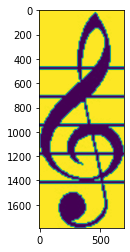

In [ ]:
import cv2

img = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/Machine Learning/sol_key.png'), cv2.COLOR_BGR2GRAY)
#img = sobel(img)
plt.imshow(img)

# Problem set 3: Change the learning rate, optimizer, kernel size, number of kernels and compare the result.

In [ ]:
# 1. Import necessary library
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10

In [ ]:
# 2. Load cifar10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]
print(X_train.shape)
print(X_val.shape)
print(y_val)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(0, 32, 32, 3)
[]


In [ ]:
# 3. Reshape the data
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train/255.
X_test = X_test/255.
X_val = X_val/255.
print(X_train.shape)
print(X_val.shape)

(50000, 32, 32, 3)
(0, 32, 32, 3)


In [ ]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',Y_train[0])

Dữ liệu y ban đầu  [6]
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# BatchNormalization()
# Init Weight ()

# 5. Create model
model = Sequential()
 
# Include Convolutional layer with 64 kernels, kernel size is 3 by 3
# use relu function as an activation function
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Create max pooling layer
model.add(MaxPooling2D())

# Create another Convolution layer with 128 kernels, kernel size is 3 by 3
# Use relu function as an activation function
model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))

# Create max pooling layer
model.add(MaxPooling2D())

# Flatten layer from tensor to vector
model.add(Flatten())

# Use softmax function to output the probability for each class.
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                81930     
Total params: 157,578
Trainable params: 157,578
Non-trainable params: 0
__________________________________________________

In [ ]:
# 6. Compile model and specify the loss function and optimizer algo.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4647 - accuracy: 0.8373
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4346 - accuracy: 0.8471
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.4062 - accuracy: 0.8576
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3796 - accuracy: 0.8654
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3559 - accuracy: 0.8751
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.3333 - accuracy: 0.8837
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3169 - accuracy: 0.8870
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2988 - accuracy: 0.8929
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2801 - accuracy: 0.9001
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.267

In [ ]:
# 8.Create another model with an increase in number of kernel and plot to observe the result
# BatchNormalization()
# Init Weight ()

model1 = Sequential()
 
# Include Convolutional layer with 64 kernels, kernel size is 3 by 3
# use relu function as an activation function
model1.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Create max pooling layer
model1.add(MaxPooling2D())

# Create another Convolution layer with 128 kernels, kernel size is 3 by 3
# Use relu function as an activation function
model1.add(Conv2D(256, (3, 3), padding='same', activation='relu'))

# Create max pooling layer
model1.add(MaxPooling2D())

# Flatten layer from tensor to vector
model1.add(Flatten())

# Use softmax function to output the probability for each class.
model1.add(Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                163850    
Total params: 462,602
Trainable params: 462,602
Non-trainable params: 0
________________________________________________

In [ ]:
# 8. Compile model and specify the loss function and optimizer algo.
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 9. Train the data
H1 = model1.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6054 - accuracy: 0.4210
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0083 - accuracy: 0.6487
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8492 - accuracy: 0.7057
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7563 - accuracy: 0.7381
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6608 - accuracy: 0.7723
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5995 - accuracy: 0.7942
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5486 - accuracy: 0.8130
Epoch 8/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4948 - accuracy: 0.8279
Epoch 9/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.4537 - accuracy: 0.8429
Epoch 10/10
1563/1563 [==============================] - 11s 7ms/step - l

In [ ]:
# 10. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
print(H.history.keys())
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
# 11.Create another model with an increase in size of kernels and plot to observe the result
# BatchNormalization()
# Init Weight ()

model1 = Sequential()
 
# Include Convolutional layer with 64 kernels, kernel size is 3 by 3
# use relu function as an activation function
model1.add(Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Create max pooling layer
model1.add(MaxPooling2D())

# Create another Convolution layer with 128 kernels, kernel size is 3 by 3
# Use relu function as an activation function
model1.add(Conv2D(128, (5, 5), padding='same', activation='relu'))

# Create max pooling layer
model1.add(MaxPooling2D())

# Flatten layer from tensor to vector
model1.add(Flatten())

# Use softmax function to output the probability for each class.
model1.add(Dense(10, activation='softmax'))

model1.summary()

In [ ]:
# 12. Compile model and specify the loss function and optimizer algo.
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 13. Train the data
H1 = model1.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

In [ ]:
# 9.Create another model with different optimizer and plot to observe the result
# BatchNormalization()
# Init Weight ()

model1 = Sequential()
 
# Include Convolutional layer with 64 kernels, kernel size is 3 by 3
# use relu function as an activation function
model1.add(Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Create max pooling layer
model1.add(MaxPooling2D())

# Create another Convolution layer with 128 kernels, kernel size is 3 by 3
# Use relu function as an activation function
model1.add(Conv2D(128, (5, 5), padding='same', activation='relu'))

# Create max pooling layer
model1.add(MaxPooling2D())

# Flatten layer from tensor to vector
model1.add(Flatten())

# Use softmax function to output the probability for each class.
model1.add(Dense(10, activation='softmax'))

model1.summary()

In [ ]:
# 10. Compile model and specify the loss function and optimizer algo.
model1.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])

In [ ]:
# 10.Create another model with different learning rate and plot to observe the result
# BatchNormalization()
# Init Weight ()

model1 = Sequential()
 
# Include Convolutional layer with 64 kernels, kernel size is 3 by 3
# use relu function as an activation function
model1.add(Conv2D(64, (5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)))

# Create max pooling layer
model1.add(MaxPooling2D())

# Create another Convolution layer with 128 kernels, kernel size is 3 by 3
# Use relu function as an activation function
model1.add(Conv2D(128, (5, 5), padding='same', activation='relu'))

# Create max pooling layer
model1.add(MaxPooling2D())

# Flatten layer from tensor to vector
model1.add(Flatten())

# Use softmax function to output the probability for each class.
model1.add(Dense(10, activation='softmax'))

model1.summary()

In [ ]:
#Change the learning rate and compile a different model
from keras import backend as K
optimizer = keras.optimizier.Adam(lr=0.01)
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [ ]:
# 9. Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

In [ ]:
# 10. Predict the image
plt.imshow(X_test[0].reshape(32,32), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,32,32,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))

# Problem set 4: Build VGG16 for cifar10
**Note**: Input shapes and number of classes in output

In [1]:
# 1. Import necessary library
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
from keras import backend as K

In [2]:
# 2. Load cifar10 data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_val, y_val = X_train[50000:60000,:], y_train[50000:60000]
X_train, y_train = X_train[:50000,:], y_train[:50000]

In [3]:
# 3. Reshape the data
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_val = X_val.reshape(X_val.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)


In [4]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [5]:
#Build the model for VGG16

model = Sequential()

#Build the first composition: 224x224x64
model.add(Conv2D(64, (3,3), padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D())

#Build the second composition: 112x112x128
model.add(Conv2D(128, (3,3), padding='same',activation='relu'))
model.add(Conv2D(128, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D())

#Build the third composition: 56x56x256
model.add(Conv2D(256, (3,3), padding='same',activation='relu'))
model.add(Conv2D(256, (3,3), padding='same',activation='relu'))
model.add(Conv2D(256, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D())

#Build the forth composition: 28x28x512
model.add(Conv2D(512, (3,3), padding='same',activation='relu'))
model.add(Conv2D(512, (3,3), padding='same',activation='relu'))
model.add(Conv2D(512, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D())

#Build the fifth composition: 14x14x512
model.add(Conv2D(512, (3,3), padding='same',activation='relu'))
model.add(Conv2D(512, (3,3), padding='same',activation='relu'))
model.add(Conv2D(512, (3,3), padding='same',activation='relu'))
model.add(MaxPooling2D())

#Build the fifth composition: Flatten
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 256)         2

In [6]:
# 6. Compile model and specify the loss function and optimizer algo.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# 7. Train model with data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=1, verbose=1)

1563/1563 [==============================] - 42s 27ms/step - loss: 2.3028 - accuracy: 0.0974


In [9]:
# 9. Evaluate the model
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[2.3026785850524902, 0.10000000149011612]


Prediction:  5


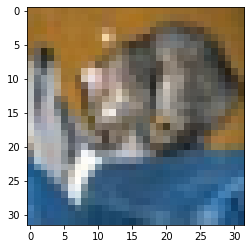

In [11]:
# 10. Predict the image
plt.imshow(X_test[0].reshape(32,32,3), cmap='gray')

y_predict = model.predict(X_test[0].reshape(1,32,32,3))
print('Prediction: ', np.argmax(y_predict))

# Problem set 5: When we build the model, why the height and width reduce, but the depth increases

Since each filter only capture small feature of the image (edges, line,...), we want to combine those features to construct the original image. Therefore, we need more filter to have more combinations.